<a href="https://colab.research.google.com/github/PritishPriyam/Text-Sentence-Similarity/blob/main/Combined_Speakers_NLP_2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

` Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`

#### Feeding dirty data into a model will give us results that are meaningless.

### Objective:

1. Getting the data
2. Cleaning the data
3. Organizing the data - organize the cleaned data into a way that is easy to input into other algorithms

### Output :
#### cleaned and organized data in two standard text formats:

1. Corpus - a collection of text
2. Document-Term Matrix - word counts in matrix format

## Problem Statement

Look at transcripts of various comedians and note their similarities and differences and find if the stand up comedian of your choice has comedy style different than other comedian.


## Getting The Data

You can get the transcripts of some comedian from [Scraps From The Loft](http://scrapsfromtheloft.com).

You can take help of IMDB and select only 10 or 20 comedian having highest rating.






### For example:

In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle
import re

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).content
    soup = BeautifulSoup(page, "lxml")
    post_content = soup.find(class_="page__content")

    if post_content:
        # Extract the text content of the found element
        text = post_content.get_text(separator=' ')
        # # Remove extra spaces between letters of the same word using regex
        # text = re.sub(r'\s+', ' ', text).strip()
        print(url)
        return text
    else:
        print(f"No content found for {url}")
        return ''

# URLs of transcripts in scope
urls = ['https://jamesclear.com/great-speeches/the-danger-of-a-single-story-by-chimamanda-ngozi-adichie',
        'https://jamesclear.com/great-speeches/what-matters-more-than-your-talents-by-jeff-bezos',
        'https://jamesclear.com/great-speeches/seeking-new-laws-by-richard-feynman',
        'https://jamesclear.com/great-speeches/2005-stanford-commencement-address-by-steve-jobs',
        'https://jamesclear.com/great-speeches/make-your-bed-by-admiral-william-h-mcraven',
        'https://jamesclear.com/great-speeches/the-fringe-benefits-of-failure-by-j-k-rowling',
        'https://jamesclear.com/great-speeches/enough-by-john-c-bogle']

# Speaker names
speakers = ['Chimamanda', 'Jeff', 'Richard', 'Steve', 'McRaven','Rowling','John']


In [ ]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://jamesclear.com/great-speeches/the-danger-of-a-single-story-by-chimamanda-ngozi-adichie
https://jamesclear.com/great-speeches/what-matters-more-than-your-talents-by-jeff-bezos
https://jamesclear.com/great-speeches/seeking-new-laws-by-richard-feynman
https://jamesclear.com/great-speeches/2005-stanford-commencement-address-by-steve-jobs
https://jamesclear.com/great-speeches/make-your-bed-by-admiral-william-h-mcraven
https://jamesclear.com/great-speeches/the-fringe-benefits-of-failure-by-j-k-rowling
https://jamesclear.com/great-speeches/enough-by-john-c-bogle


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [ ]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(speakers):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

mkdir: cannot create directory ‘transcripts’: File exists


In [ ]:
# Load pickled files (To ensure its working)
data = {}
for i, c in enumerate(speakers):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['Chimamanda', 'Jeff', 'Richard', 'Steve', 'McRaven', 'Rowling', 'John'])

In [ ]:
# More checks
data['Jeff'][:80]

'\n Background \n This speech was originally delivered as the baccalaureate\xa0remarks'

## Cleaning The Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.
### Assignment:
1. Perform the following data cleaning on transcripts:
i) Make text all lower case
ii) Remove punctuation
iii) Remove numerical values
iv) Remove common non-sensical text (/n)
v) Tokenize text
vi) Remove stop words

In [ ]:
#Just checking the data dictionary
# Let's take a look at our data again
next(iter(data.keys()))

'Chimamanda'

In [ ]:
# Notice that our dictionary is currently in key: speaker, value: list of text format
next(iter(data.values()))

'\n \n \n \n Background \n This speech was originally delivered at TEDGlobal in July of 2009. TED is the copyright owner of this talk and the  original video  is featured above. \n Speech Transcript \n I’m a storyteller. And I would like to tell you a few personal stories about what I like to call “the danger of the single story.” \n I grew up on a university campus in eastern Nigeria. My mother says that I started reading at the age of two, although I think four is probably close to the truth. So I was an early reader, and what I read were British and American children’s books. \n I was also an early writer, and when I began to write, at about the age of seven, stories in pencil with crayon illustrations that my poor mother was obligated to read, I wrote exactly the kinds of stories I was reading: All my characters were white and blue-eyed, they played in the snow, they ate apples, and they talked a lot about the weather, how lovely it was that the sun had come out. \n Now, this despi

In [ ]:
# We are going to change this to key: speaker, value: string format

def combine_text(list_of_text):
    #Takes list of text and combines it into one large chunk of text
    combined_text=' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
'''
This code snippet creates a new dictionary data_combined where each comedian's
transcript is represented as a single string instead of a list of text fragments.
This format might be more convenient for certain types of text analysis or processing tasks.
'''
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

# Remove newline escape characters from the text fragments before combining
data_combined = {key: [value.replace('\n', '')] for key, value in data.items()}


In [ ]:
data_combined

{'Chimamanda': ['    Background  This speech was originally delivered at TEDGlobal in July of 2009. TED is the copyright owner of this talk and the  original video  is featured above.  Speech Transcript  I’m a storyteller. And I would like to tell you a few personal stories about what I like to call “the danger of the single story.”  I grew up on a university campus in eastern Nigeria. My mother says that I started reading at the age of two, although I think four is probably close to the truth. So I was an early reader, and what I read were British and American children’s books.  I was also an early writer, and when I began to write, at about the age of seven, stories in pencil with crayon illustrations that my poor mother was obligated to read, I wrote exactly the kinds of stories I was reading: All my characters were white and blue-eyed, they played in the snow, they ate apples, and they talked a lot about the weather, how lovely it was that the sun had come out.  Now, this despite t

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
# pd.set_option('max_colwidth',250)

# data_df = pd.DataFrame.from_dict(data_combined).transpose()
# data_df.columns = ['transcript']
# data_df = data_df.sort_index()
# data_df

data_df = pd.DataFrame.from_dict(data_combined, orient='index', columns=['transcript'])
data_df

,transcript
Chimamanda,Background This speech was originally del...
Jeff,Background This speech was originally delive...
Richard,Background This speech was delivered as part...
Steve,Background This speech was delivered as the ...
McRaven,Background This speech was delivered as the ...
Rowling,Background This speech was originally deliv...
John,Background John C. Bogle is the founder of T...


In [ ]:
# Let's take a look at the transcript for Ali Wong
data_df.transcript.loc['Steve']

' Background  This speech was delivered as the commencement address to the graduates of Stanford University on June 12, 2005.  1  Speech Transcript  I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.  The first story is about connecting the dots.  I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?  It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they 

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
Chimamanda,background this speech was originally del...
Jeff,background this speech was originally delive...
Richard,background this speech was delivered as part...
Steve,background this speech was delivered as the ...
McRaven,background this speech was delivered as the ...
Rowling,background this speech was originally deliv...
John,background john c. bogle is the founder of t...


In [ ]:
# # Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    #text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

data_df = data_clean

## Organizing The Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [ ]:
# Let's take a look at our dataframe
data_df

,transcript
Chimamanda,background this speech was originally del...
Jeff,background this speech was originally delive...
Richard,background this speech was delivered as part...
Steve,background this speech was delivered as the ...
McRaven,background this speech was delivered as the ...
Rowling,background this speech was originally deliv...
John,background john c. bogle is the founder of t...


In [ ]:
# Let's add the speakers' full names as well
full_names = ['Chimamanda Ngozi','Jeff Bezos', 'Admiral McRaven', 'Richard Feynman','Steve Jobs', 'JK Rowling', 'John Bogle']

data_df['full_name'] = full_names
data_df

,transcript,full_name
Chimamanda,background this speech was originally del...,Chimamanda Ngozi
Jeff,background this speech was originally delive...,Jeff Bezos
Richard,background this speech was delivered as part...,Admiral McRaven
Steve,background this speech was delivered as the ...,Richard Feynman
McRaven,background this speech was delivered as the ...,Steve Jobs
Rowling,background this speech was originally deliv...,JK Rowling
John,background john c. bogle is the founder of t...,John Bogle


In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a given text
def remove_stopwords(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the remove_stopwords function to each transcript in the DataFrame
data_clean['transcript'] = data_clean['transcript'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer with stop words
# cv = CountVectorizer(stop_words='english')
# data_cv = cv.fit_transform(data_clean.transcript)
# data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_dtm.index = data_clean.index
# data_dtm

# Instantiate CountVectorizer with stop words
custom_stop_words = ['english', 'background', 'speech','transcript','copyright','original','originally', 'this',
                     'that', 'it', 'is', 'are', 'was','tedglobal','the','and','to','when','as','me','you']
cv = CountVectorizer(stop_words=custom_stop_words)
data_cv = cv.fit_transform(data_clean.transcript)

# Debugging: Print vocabulary to inspect
print("Vocabulary:", cv.vocabulary_)

# Check if vocabulary is empty
if not cv.vocabulary_:
    print("Error: Vocabulary is empty")

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

Vocabulary: {'delivered': 750, 'july': 1638, 'ted': 2983, 'owner': 2114, 'talk': 2962, 'video': 3217, 'featured': 1118, 'storyteller': 2842, 'would': 3338, 'like': 1738, 'tell': 2986, 'personal': 2197, 'stories': 2840, 'call': 376, 'danger': 701, 'single': 2713, 'story': 2841, 'grew': 1323, 'university': 3172, 'campus': 389, 'eastern': 892, 'nigeria': 2014, 'mother': 1943, 'says': 2603, 'started': 2810, 'reading': 2422, 'age': 73, 'two': 3131, 'although': 100, 'think': 3022, 'four': 1208, 'probably': 2318, 'close': 505, 'truth': 3116, 'early': 886, 'reader': 2420, 'read': 2419, 'british': 345, 'american': 110, 'children': 467, 'books': 313, 'also': 97, 'writer': 3342, 'began': 259, 'write': 3341, 'seven': 2668, 'pencil': 2176, 'crayon': 670, 'illustrations': 1482, 'poor': 2260, 'obligated': 2049, 'wrote': 3348, 'exactly': 1011, 'kinds': 1662, 'characters': 453, 'white': 3291, 'blue': 302, 'eyed': 1079, 'played': 2238, 'snow': 2748, 'ate': 193, 'apples': 149, 'talked': 2963, 'lot': 1776

,abandon,ability,abject,able,absolutely,absurd,abusers,academic,accelerating,accept,...,years,yes,yesterday,yet,yields,york,yoruba,young,yukawa,zero
Chimamanda,0,1,1,0,0,0,1,0,0,0,...,5,0,0,0,0,0,1,1,0,0
Jeff,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,1,0,1,0,0
Richard,0,0,0,11,2,1,0,0,1,0,...,4,6,0,4,0,0,0,2,3,0
Steve,0,0,0,0,0,0,0,0,0,0,...,9,0,0,2,0,0,0,2,0,0
McRaven,0,0,0,0,0,0,0,0,0,1,...,4,0,0,1,0,0,0,2,0,0
Rowling,1,3,0,1,0,0,0,1,0,0,...,4,0,0,3,0,0,0,3,0,0
John,0,0,0,0,0,0,0,0,0,0,...,4,5,1,3,1,0,0,2,0,1


In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [ ]:
data_clean




,transcript,full_name
Chimamanda,background speech originally delivered tedglob...,Chimamanda Ngozi
Jeff,background speech originally delivered baccala...,Jeff Bezos
Richard,background speech delivered part messenger lec...,Admiral McRaven
Steve,background speech delivered commencement addre...,Richard Feynman
McRaven,background speech delivered commencement addre...,Steve Jobs
Rowling,background speech originally delivered commenc...,JK Rowling
John,background john c. bogle founder vanguard grou...,John Bogle


In [ ]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Additional Assignments:

1. Can you add an additional regular expression to the clean_text_round2 function to further clean the text?
2. Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

In [ ]:
# 1
def clean_text_round2(text):
    # Remove additional punctuation and non-sensical text
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('\(.*?\)', '', text)  # Remove text within parentheses
    text = re.sub('\s+', ' ', text)  # Remove extra whitespaces
    # text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text

# Apply clean_text_round2 function to the transcript data
data_clean_round2 = data_clean['transcript'].apply(clean_text_round2)

# Print the cleaned text
for transcript in data_clean_round2:
    print(transcript)

background speech originally delivered tedglobal july . ted copyright owner talk original video featured . speech transcript storyteller . would like tell personal stories like call danger single story. grew university campus eastern nigeria . mother says started reading age two , although think four probably close truth . early reader , read british american children books . also early writer , began write , age seven , stories pencil crayon illustrations poor mother obligated read , wrote exactly kinds stories reading : characters white blue-eyed , played snow , ate apples , talked lot weather , lovely sun come . , despite fact lived nigeria . never outside nigeria . snow , ate mangoes , never talked weather , need . characters also drank lot ginger beer , characters british books read drank ginger beer . never mind idea ginger beer . many years afterwards , would desperate desire taste ginger beer . another story . demonstrates , think , impressionable vulnerable face story , partic

In [ ]:

# Sample data
data_clean1 = {
    'script': [
        " Background speech this was originally given at Stanford",
        # Add more transcript entries if necessary
    ]
}

# Instantiate CountVectorizer with varying ngram_range
ngram_ranges = [(1, 1), (1, 2), (2, 2)]  # Try unigrams, unigrams + bigrams, and only bigrams
results = []

for ngram_range in ngram_ranges:
    cv1 = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    data_cv1 = cv1.fit_transform(data_clean1['script'])
    feature_names1 = cv1.get_feature_names_out()

    # Create DataFrame with the document-term matrix for the current ngram_range
    data_dtm1 = pd.DataFrame(data_cv1.toarray(), columns=feature_names1)
    results.append((ngram_range, data_dtm1))

# Print the results for each ngram_range
for ngram_range, data_dtm1 in results:
    print(f"Results for ngram_range={ngram_range}:")
    print(data_dtm1)
    print("\n")

Results for ngram_range=(1, 1):
   background  given  originally  speech  stanford
0           1      1           1       1         1


Results for ngram_range=(1, 2):
   background  background speech  given  given stanford  originally  \
0           1                  1      1               1           1   

   originally given  speech  speech originally  stanford  
0                 1       1                  1         1  


Results for ngram_range=(2, 2):
   background speech  given stanford  originally given  speech originally
0                  1               1                 1                  1




In [ ]:

# `CountVectorizer` is a tool provided by scikit-learn for converting a collection of text documents into a matrix of token counts.
# It is commonly used in natural language processing (NLP) tasks for feature extraction.

# Here are explanations for the parameters you mentioned:

# 1. **ngram_range**:
#    - `ngram_range` is a tuple parameter that specifies the range of n-grams to consider when tokenizing text.
#    - An n-gram is a contiguous sequence of n items (words or characters) from a given sample of text. For example, in the sentence "The quick brown fox jumps", the 2-grams (or bigrams) are: "The quick", "quick brown", "brown fox", and "fox jumps".
#    - By default, `ngram_range` is set to `(1, 1)`, which means only unigrams (single words) are considered. You can specify different ranges, such as `(1, 2)` for unigrams and bigrams, `(2, 2)` for only bigrams, or even `(1, 3)` for unigrams, bigrams, and trigrams.

In [ ]:
# 2. **min_df and max_df**:
#    - `min_df` and `max_df` are parameters used to filter out terms based on their document frequency (DF) within the corpus.
#    - `min_df` is the minimum document frequency: it specifies the minimum number of documents in which a term (word) must appear to be included in the vocabulary. Terms that appear in fewer documents than `min_df` will be ignored.
#    - `max_df` is the maximum document frequency: it specifies the maximum proportion of documents in which a term can appear to be included in the vocabulary. Terms that appear in more documents than `max_df` will be ignored.
#    - Both `min_df` and `max_df` can be specified as:
#      - Integer: Represents the absolute count of documents.
#      - Float: Represents the proportion of documents in the corpus (e.g., 0.2 means 20% of documents).
#    - By default, `min_df` and `max_df` are set to 1 and 1.0, respectively, meaning that all terms appearing in at least one document and no more than all documents (100%) will be included in the vocabulary.

# Using `ngram_range`, `min_df`, and `max_df` parameters allows you to customize the tokenization process and control the vocabulary size when using `CountVectorizer` in scikit-learn.
# Adjusting these parameters can have significant impacts on the resulting features and model performance in text analysis tasks.

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1:
#### Find `Most Common Words` and create word cloud.

abandon        1
ability        4
abject         1
able          12
absolutely     2
              ..
york           1
yoruba         1
young         13
yukawa         3
zero           1
Length: 3361, dtype: int64


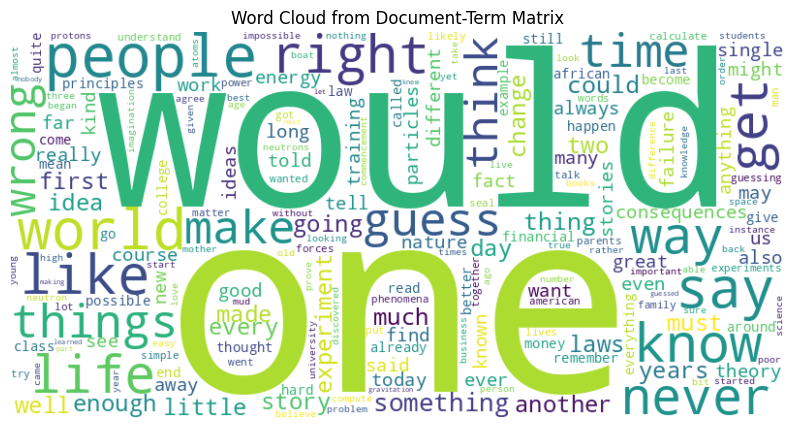

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get word frequencies from the document-term matrix
word_freq = data_dtm.sum()

print(word_freq)

# Create a dictionary of word frequencies
word_freq_dict = dict(word_freq)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Document-Term Matrix')
plt.show()


#### Find  and print the top 30 words said by each comedian


In [ ]:
# # Instantiate CountVectorizer
# cv = CountVectorizer()

# # Fit and transform the text data
# data_cv = cv.fit_transform(data_clean['transcript'])

# Create DataFrame with the document-term matrix
# data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out(), index=data_clean.index)

# Calculate total frequency of each word for each speaker
word_freq_by_speaker = data_dtm.transpose()

# Create a DataFrame to store the top 30 words for each speaker
top_words_df = pd.DataFrame(index=range(30))

# Populate the DataFrame with the top words for each speaker
for speaker in data_clean.index:
    top_words_df[speaker] = word_freq_by_speaker[speaker].sort_values(ascending=False).head(30).index.tolist()

# Display the DataFrame
print("Top 30 words for each speaker:")
print(top_words_df)


Top 30 words for each speaker:
    Chimamanda          Jeff       Richard       Steve   McRaven      Rowling  \
0        story         gifts           say        life       one        never   
1      stories          life         guess     college     world      failure   
2       people       choices           one         one  training         life   
3       single   grandmother         right       would    change       people   
4      african        follow         wrong       years       day          one   
5         read         years          laws       apple      seal          day   
6         like        wanted          know       never     every        might   
7     roommate           car           get      months       mud        would   
8         many         would    experiment     dropped      boat      parents   
9        could   grandfather        things     looking      want         live   
10      africa           per          like       later  students   graduation 

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.


#### If more than half of the comedians have it as a top word, exclude it from the list

In [ ]:
from collections import Counter

# Combine the top words for each speaker into a single list
all_top_words = top_words_df.values.flatten()

# Count the occurrences of each word
word_counts = Counter(all_top_words)

# Optionally, filter out common stop words if needed
# Example: common_stop_words = ['the', 'and', 'to', ...]
# for stop_word in common_stop_words:
#     del word_counts[stop_word]

# Sort the words based on their frequency
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Display the sorted list along with the number of speakers each word occurs in
print("Top words and their occurrences across speakers:")
for word, count in sorted_word_counts:
    print(f"{word}: {count} speakers")


Top words and their occurrences across speakers:
one: 6 speakers
would: 6 speakers
life: 4 speakers
way: 4 speakers
never: 3 speakers
world: 3 speakers
people: 3 speakers
years: 3 speakers
get: 3 speakers
think: 3 speakers
time: 3 speakers
day: 2 speakers
like: 2 speakers
know: 2 speakers
many: 2 speakers
parents: 2 speakers
want: 2 speakers
great: 2 speakers
also: 2 speakers
said: 2 speakers
old: 2 speakers
idea: 2 speakers
told: 2 speakers
make: 2 speakers
ever: 2 speakers
something: 2 speakers
well: 2 speakers
must: 2 speakers
story: 1 speakers
gifts: 1 speakers
say: 1 speakers
financial: 1 speakers
stories: 1 speakers
guess: 1 speakers
college: 1 speakers
failure: 1 speakers
enough: 1 speakers
choices: 1 speakers
training: 1 speakers
money: 1 speakers
single: 1 speakers
grandmother: 1 speakers
right: 1 speakers
change: 1 speakers
business: 1 speakers
african: 1 speakers
follow: 1 speakers
wrong: 1 speakers
read: 1 speakers
laws: 1 speakers
apple: 1 speakers
seal: 1 speakers
may: 1 

In [ ]:
# Identify common words across speakers
common_words = [word for word, count in sorted_word_counts if count == len(data_clean)]
common_words

[]

In [ ]:
# Update the list of stop words for CountVectorizer
updated_stop_words = ['the', 'of', 'and', 'that', 'to', 'it', 'was', 'in', 'have']

# Instantiate CountVectorizer with updated stop words
cv_updated = CountVectorizer(stop_words=updated_stop_words)

# Fit and transform the text data with the updated CountVectorizer
data_cv_updated = cv_updated.fit_transform(data_clean['transcript'])

# Create DataFrame with the updated document-term matrix
data_dtm_updated = pd.DataFrame(data_cv_updated.toarray(), columns=cv_updated.get_feature_names_out(), index=data_clean.index)

# Display the updated document-term matrix
print("Updated Document-Term Matrix:")
print(data_dtm_updated)

Updated Document-Term Matrix:
            abandon  ability  abject  able  absolutely  absurd  abusers  \
Chimamanda        0        1       1     0           0       0        1   
Jeff              0        0       0     0           0       0        0   
Richard           0        0       0    11           2       1        0   
Steve             0        0       0     0           0       0        0   
McRaven           0        0       0     0           0       0        0   
Rowling           1        3       0     1           0       0        0   
John              0        0       0     0           0       0        0   

            academic  accelerating  accept  ...  yes  yesterday  yet  yields  \
Chimamanda         0             0       0  ...    0          0    0       0   
Jeff               0             0       0  ...    0          0    0       0   
Richard            0             1       0  ...    6          0    4       0   
Steve              0             0       0  ...  

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [ ]:
# Identify the non-zero items in the document-term matrix
non_zero_items = (data_dtm != 0).sum(axis=1)

# Calculate the unique word count for each speaker
unique_word_count = non_zero_items.to_frame(name='Unique Word Count')

# Display the new DataFrame
print("Unique Word Count for Each Speaker:")
print(unique_word_count)


Unique Word Count for Each Speaker:
            Unique Word Count
Chimamanda                733
Jeff                      434
Richard                  1171
Steve                     585
McRaven                   771
Rowling                   854
John                      562


In [ ]:
# Calculate total number of words for each comedian
data_clean['total_words'] = data_clean['transcript'].apply(lambda x: len(x.split()))

# Define or obtain the run times for each speech
# Assuming run_times is a list of run times in minutes
run_times = [18, 10, 55, 15, 19,21, 22]

# Add the run_times column to the DataFrame
data_clean['run_times'] = run_times

# Calculate words per minute for each comedian
data_clean['words_per_minute'] = data_clean['total_words'] / data_clean['run_times']

# Sort the DataFrame by words per minute
sorted_data = data_clean.sort_values(by='words_per_minute', ascending=False)

# Display the sorted DataFrame
print("Sorted DataFrame by words per minute:")
print(sorted_data)

Sorted DataFrame by words per minute:
                                                   transcript  \
Richard     background speech delivered part messenger lec...   
McRaven     background speech delivered commencement addre...   
Chimamanda  background speech originally delivered tedglob...   
Steve       background speech delivered commencement addre...   
Jeff        background speech originally delivered baccala...   
Rowling     background speech originally delivered commenc...   
John        background john c. bogle founder vanguard grou...   

                   full_name  total_words  run_times  words_per_minute  
Richard      Admiral McRaven         6009         55        109.254545  
McRaven           Steve Jobs         2020         19        106.315789  
Chimamanda  Chimamanda Ngozi         1736         18         96.444444  
Steve        Richard Feynman         1334         15         88.933333  
Jeff              Jeff Bezos          853         10         85.300000  
Row

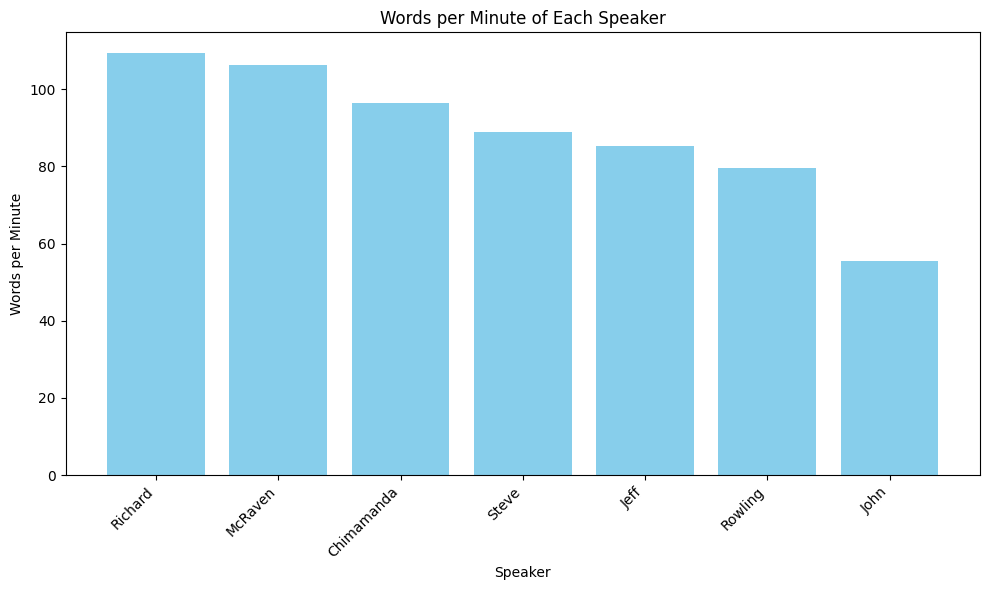

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_data.index, sorted_data['words_per_minute'], color='skyblue')
plt.xlabel('Speaker')
plt.ylabel('Words per Minute')
plt.title('Words per Minute of Each Speaker')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Define the target words
target_words = ['focus', 'believe', 'faith', 'God','true','help',
                'strong','stand','science','desire','win','fall','lose','fail',
                'hope','change','love','future']

# Create a dictionary to store the word counts for each speaker
word_counts = {word: [] for word in target_words}

# Iterate through each speaker's transcript
for speaker, transcript in data_clean.iterrows():
    # Initialize counts for the current speaker
    speaker_word_counts = {word: 0 for word in target_words}

    # Tokenize the transcript into words
    words = transcript['transcript'].split()

    # Count the occurrences of the target words in the transcript
    for word in words:
        if word in target_words:
            speaker_word_counts[word] += 1

    # Append the word counts for the current speaker to the dictionary
    for word, count in speaker_word_counts.items():
        word_counts[word].append(count)

# Convert the word counts dictionary to a DataFrame
word_counts_df = pd.DataFrame(word_counts, index=data_clean.index)

# Display the DataFrame
print("Word Counts for Each Speaker:")
print(word_counts_df)


Word Counts for Each Speaker:
            focus  believe  faith  God  true  help  strong  stand  science  \
Chimamanda      0        0      0    0     0     1       0      0        0   
Jeff            0        1      0    0     0     0       0      0        0   
Richard         0        9      0    0     9     2       5      1       11   
Steve           1        1      1    0     2     2       0      0        1   
McRaven         0        0      0    0     0     5       1      1        0   
Rowling         0        0      0    0     1     0       1      2        0   
John            0        0      0    0     2     0       0      0        0   

            desire  win  fall  lose  fail  hope  change  love  future  
Chimamanda       1    0     0     0     1     0       0     1       0  
Jeff             0    0     1     0     0     0       0     1       0  
Richard          0    0     1     0     0     1       8     5       4  
Steve            0    0     1     2     0     2       2  

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

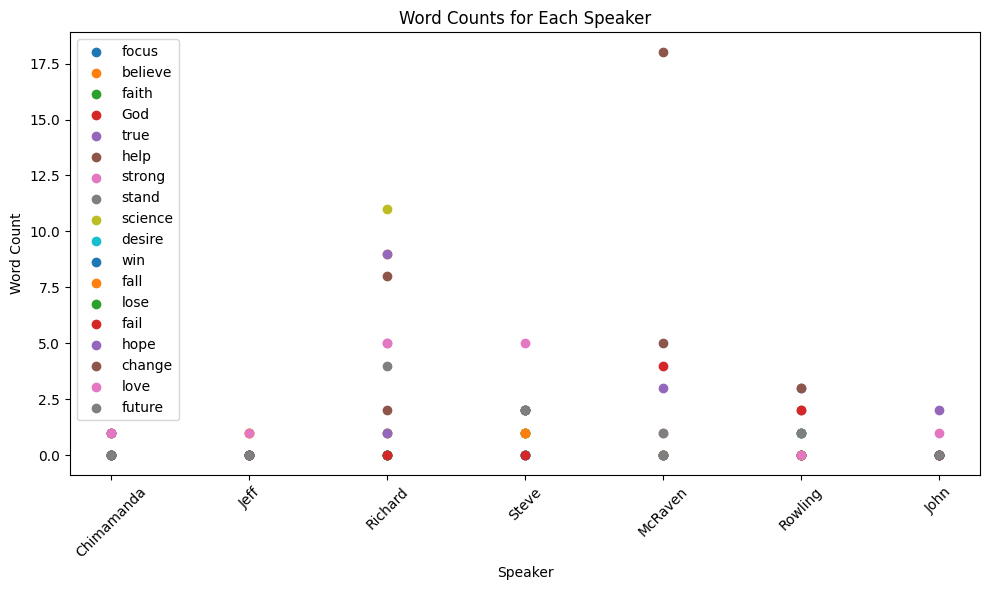

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot each word count
for word in target_words:
    plt.scatter(word_counts_df.index, word_counts_df[word], label=word)

# Add labels and title
plt.title('Word Counts for Each Speaker')
plt.xlabel('Speaker')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# OBSERVATIONS & INSIGHTS

From the various plots and computations, we have observed the following:


*   Richard Feynman delivers his speech at the fastest pace among all speakers.

*   Jeff Bezos speaks at a notably slower pace compared to other speakers.

*   Upon examining the frequency of specific words and their usage across speakers, distinct patterns emerge that align with their respective careers.

*   Richard Feynman, renowned for his contributions to physics, recurrently references "science" throughout his speech, reflecting his expertise and focus on scientific principles.





In [ ]:
# Ideas : We could compare a speakers speeches over a period of time and observe the differences.

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on text
def analyze_sentiment(text):
    # Get sentiment scores for the text
    sentiment_scores = sia.polarity_scores(text)
    # Determine sentiment label based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:


# Perform sentiment analysis for each speaker
speaker_sentiments = {}

for i, url in enumerate(urls):
    transcript = url_to_transcript(url)
    speaker = speakers[i]
    sentiment = analyze_sentiment(transcript)
    speaker_sentiments[speaker] = sentiment

# Display sentiment analysis results for each speaker
for speaker, sentiment in speaker_sentiments.items():
    print(f"{speaker}: {sentiment}")



https://jamesclear.com/great-speeches/the-danger-of-a-single-story-by-chimamanda-ngozi-adichie
https://jamesclear.com/great-speeches/what-matters-more-than-your-talents-by-jeff-bezos
https://jamesclear.com/great-speeches/seeking-new-laws-by-richard-feynman
https://jamesclear.com/great-speeches/2005-stanford-commencement-address-by-steve-jobs
https://jamesclear.com/great-speeches/make-your-bed-by-admiral-william-h-mcraven
https://jamesclear.com/great-speeches/the-fringe-benefits-of-failure-by-j-k-rowling
https://jamesclear.com/great-speeches/enough-by-john-c-bogle
Chimamanda: Positive
Jeff: Positive
Richard: Positive
Steve: Positive
McRaven: Positive
Rowling: Positive
John: Positive


In [ ]:
nltk.download('punkt')
nltk.download('cmudict')

from nltk.tokenize import word_tokenize
from nltk.corpus import cmudict

# Function to calculate average word length
def average_word_length(text):
    words = word_tokenize(text)
    total_chars = sum(len(word) for word in words)
    return total_chars / len(words)

# Function to calculate average syllable count
def average_syllable_count(text):
    words = word_tokenize(text)
    d = cmudict.dict()
    syllable_count = sum(len([phoneme for phoneme in d[word.lower()] if phoneme[-1].isdigit()])
                         if word.lower() in d else 1
                         for word in words)
    return syllable_count / len(words)

# # Cleaned text data for each speaker
# cleaned_texts = [
#     "cleaned text for Chimamanda's speech",
#     "cleaned text for Jeff's speech",
#     "cleaned text for Richard's speech",
#     "cleaned text for Steve's speech",
#     "cleaned text for McRaven's speech",
#     "cleaned text for Rowling's speech"
# ]

# Perform vocabulary complexity analysis for each speaker
for speaker, text in zip(speakers,transcripts):
    avg_word_length = average_word_length(text)
    avg_syllable_count = average_syllable_count(text)

    # Display the vocabulary complexity metrics for the speaker
    print(f"Speaker: {speaker}")
    print(f"Average Word Length: {avg_word_length:.2f}")
    print(f"Average Syllable Count: {avg_syllable_count:.2f}")
    print("\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


Speaker: Chimamanda
Average Word Length: 3.99
Average Syllable Count: 0.14


Speaker: Jeff
Average Word Length: 3.67
Average Syllable Count: 0.16


Speaker: Richard
Average Word Length: 3.85
Average Syllable Count: 0.16


Speaker: Steve
Average Word Length: 3.70
Average Syllable Count: 0.14


Speaker: McRaven
Average Word Length: 3.93
Average Syllable Count: 0.14


Speaker: Rowling
Average Word Length: 4.09
Average Syllable Count: 0.12


Speaker: John
Average Word Length: 4.13
Average Syllable Count: 0.19




In [ ]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# from nltk.tokenize import word_tokenize, sent_tokenize

# # Function to perform Named Entity Recognition (NER)
# def ner_analysis(text):
#     sentences = sent_tokenize(text)
#     tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
#     tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
#     named_entities = nltk.ne_chunk_sents(tagged_sentences, binary=False)

#     entities = []
#     for tree in named_entities:
#         for entity in tree:
#             if isinstance(entity, nltk.Tree):
#                 entities.append(" ".join([word for word, pos in entity.leaves()]))

#     return entities

# # Cleaned text data for each speaker
# cleaned_texts = [
#     "cleaned text for Chimamanda's speech",
#     "cleaned text for Jeff's speech",
#     "cleaned text for Richard's speech",
#     "cleaned text for Steve's speech",
#     "cleaned text for McRaven's speech",
#     "cleaned text for Rowling's speech"
# ]

# # Perform NER analysis for each speaker
# for speaker, text in zip(speakers, cleaned_texts):
#     named_entities = ner_analysis(text)

#     # Display the named entities for the speaker
#     print(f"Speaker: {speaker}")
#     print(f"Named Entities:")
#     for entity in named_entities:
#         print(entity)
#     print("\n")


In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd # Data Manipulation

data = pd.read_pickle('data_clean.pkl') # This function reads a pickled object from the specified file
# and returns it as a DataFrame.
data

,transcript,full_name
Chimamanda,background speech originally delivered tedglob...,Chimamanda Ngozi
Jeff,background speech originally delivered baccala...,Jeff Bezos
Richard,background speech delivered part messenger lec...,Admiral McRaven
Steve,background speech delivered commencement addre...,Richard Feynman
McRaven,background speech delivered commencement addre...,Steve Jobs
Rowling,background speech originally delivered commenc...,JK Rowling
John,background john c. bogle founder vanguard grou...,John Bogle


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

# 0 - 1 : Factual - Subjective

# TextBlob is a Python library for processing textual data,
# including tasks like part-of-speech tagging, noun phrase extraction, and sentiment analysis.
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data


,transcript,full_name,polarity,subjectivity
Chimamanda,background speech originally delivered tedglob...,Chimamanda Ngozi,0.062128,0.408521
Jeff,background speech originally delivered baccala...,Jeff Bezos,0.166635,0.555493
Richard,background speech delivered part messenger lec...,Admiral McRaven,0.072242,0.559498
Steve,background speech delivered commencement addre...,Richard Feynman,0.196702,0.482487
McRaven,background speech delivered commencement addre...,Steve Jobs,0.036570,0.448254
Rowling,background speech originally delivered commenc...,JK Rowling,0.097291,0.470443
John,background john c. bogle founder vanguard grou...,John Bogle,0.144966,0.471535


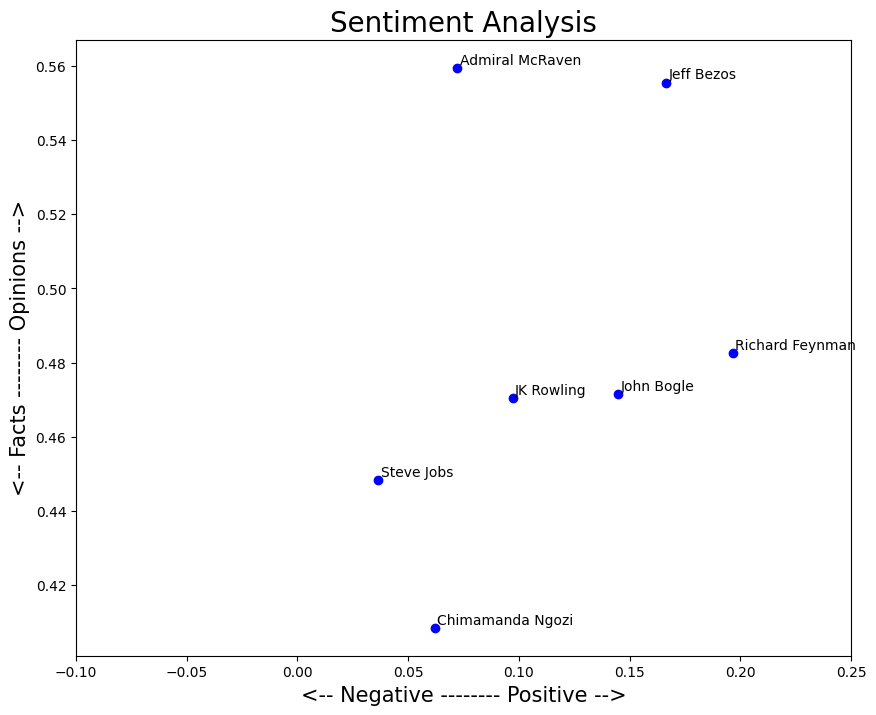

0.16663482492564122


In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt
# sets the size of the figure that will contain the scatter plot. It specifies that the figure should be 10 inches wide and 8 inches tall.
plt.rcParams['figure.figsize'] = [10, 8]


for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    # plt.text adds text labels to each point in the scatter plot.
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.1, .25)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

print(data.polarity.loc["Jeff"])

In [ ]:
import plotly.express as px

fig = px.scatter(data, x='polarity', y='subjectivity', text=data['full_name'], title='Sentiment Analysis',
                 labels={'polarity': 'Sentiment', 'subjectivity': 'Fact vs Opinion'})

fig.update_traces(marker=dict(color='blue'), textfont=dict(size=10), hoverinfo='text')
fig.update_layout(title_font_size=20, xaxis_title_font_size=15, yaxis_title_font_size=15)

fig.show()


In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list


In [ ]:
data

,transcript,full_name,polarity,subjectivity
Chimamanda,background speech originally delivered tedglob...,Chimamanda Ngozi,0.062128,0.408521
Jeff,background speech originally delivered baccala...,Jeff Bezos,0.166635,0.555493
Richard,background speech delivered part messenger lec...,Admiral McRaven,0.072242,0.559498
Steve,background speech delivered commencement addre...,Richard Feynman,0.196702,0.482487
McRaven,background speech delivered commencement addre...,Steve Jobs,0.036570,0.448254
Rowling,background speech originally delivered commenc...,JK Rowling,0.097291,0.470443
John,background john c. bogle founder vanguard grou...,John Bogle,0.144966,0.471535


<ipython-input-280-18e2acfb65d4>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




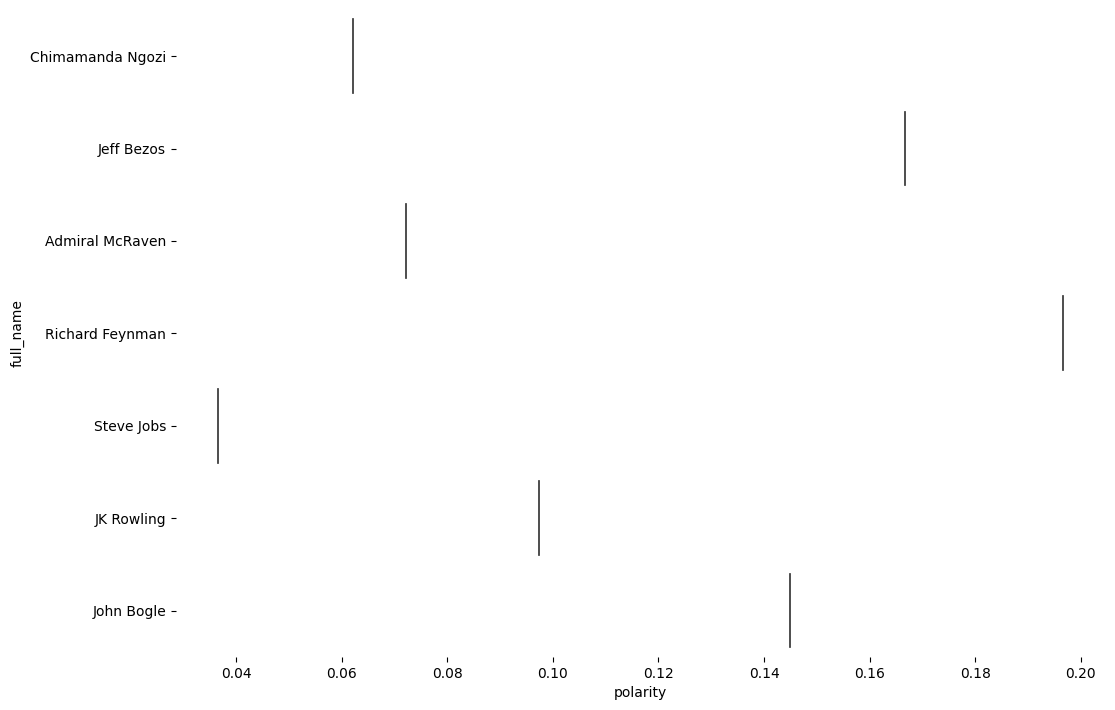

In [ ]:
# @title full_name vs polarity

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['full_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='polarity', y='full_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces


[['background speech originally delivered tedglobal july . ted copyright owner talk original video featured . speech transcript ’ storyteller . would like tell personal stories like call “ danger single story. ” grew university campus eastern nigeria . mother says started reading age two , although think four probably close truth . early reader , read british american children ’ books . also early writer , began write , age seven , stories pencil crayon illustrations poor mother obligated read , wrote exactly kinds stories reading : characters white blue-eyed , played snow , ate apples , talked lot weather , lovely sun come . , despite fact lived nigeria . never outside nigeria . ’ snow , ate mangoes , never talked weather , need . characters also drank lot ginger beer , characters british books read drank ginger beer . never mind idea ginger beer . many years afterwards , would desperate desire taste ginger beer . another story . demonstrates , think , impressionable vulnerable face s

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

7

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.03527568922305764,
  0.0710368996083282,
  -0.08053391053391054,
  0.2701058201058201,
  -0.03407738095238095,
  0.010736089307517882,
  0.13581780538302277,
  -0.017238095238095226,
  0.23796296296296296,
  0.13071428571428573],
 [0.09166666666666667,
  -0.033333333333333326,
  0.26275510204081626,
  0.0642857142857143,
  0.22595238095238096,
  0.18051948051948052,
  0.08499999999999999,
  0.21824085005903185,
  0.22803030303030303,
  0.2280982905982906],
 [0.16292225247870407,
  0.08417830906467275,
  0.048930763329497494,
  0.059790492526341575,
  0.033886859668109656,
  0.06920603551038332,
  0.005019554309327035,
  0.07141454224787559,
  0.18474677932509256,
  0.03655018227386648],
 [0.13939393939393938,
  0.063125,
  0.4259259259259259,
  0.15575396825396826,
  0.10416666666666666,
  0.3064182194616977,
  0.2677705627705628,
  0.081998556998557,
  0.11195670995670995,
  0.184375],
 [0.10637755102040818,
  0.08773809523809524,
  -0.012841021825396814,
  0.006620082815734988,
 

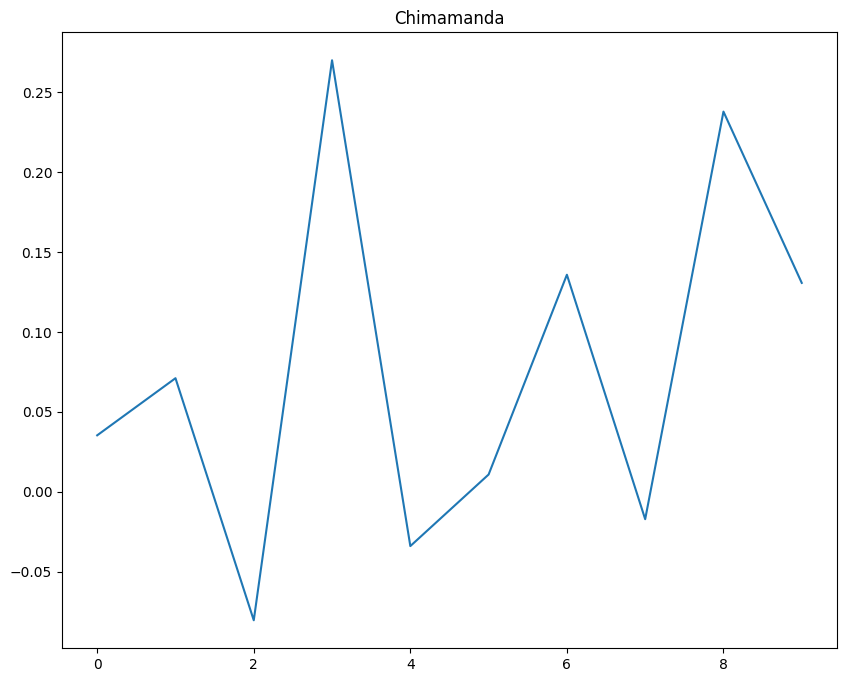

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

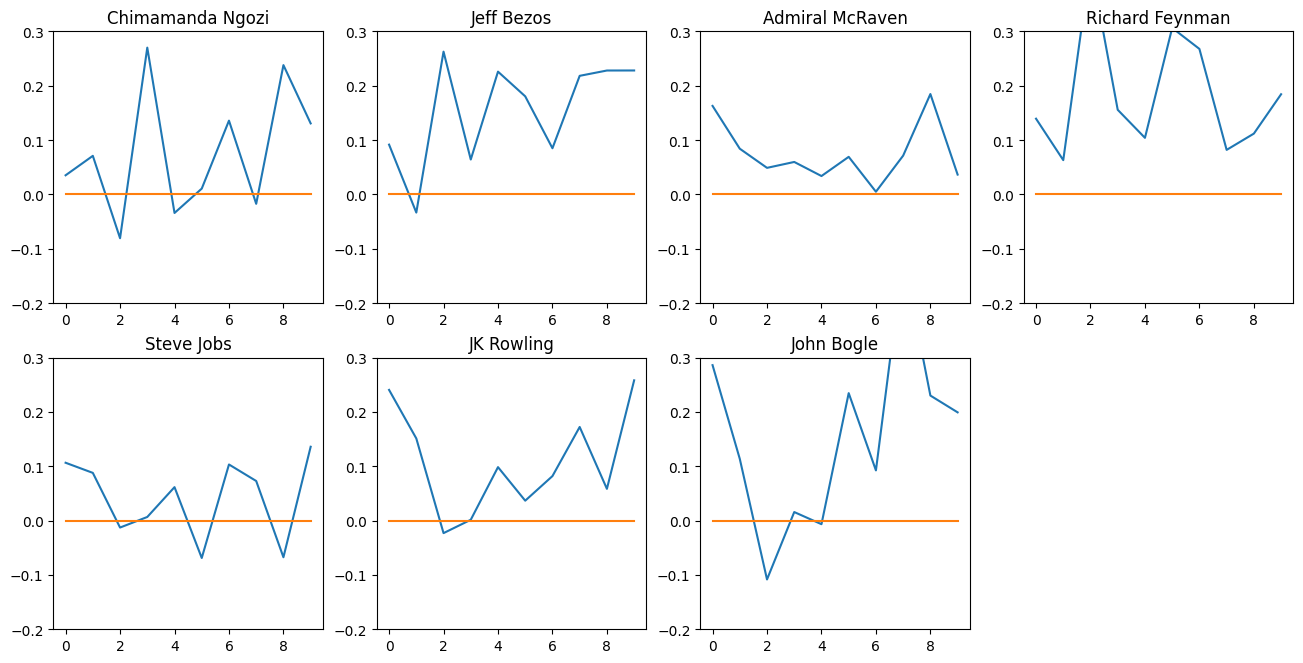

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.5)

plt.show()

In [ ]:
subjectivity_transcript = []
for lp in list_pieces:
    subj_piece = []
    for s in lp:
        subj_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript.append(polarity_piece)

subjectivity_transcript

[[0.32802197802197797,
  0.3705128205128205,
  0.3057513914656772,
  0.42518796992481206,
  0.36665393430099313,
  0.5081349206349207,
  0.3455952380952381,
  0.40327380952380953,
  0.2370535714285714,
  0.5145658263305323,
  0.670952380952381,
  0.32529761904761906,
  0.475,
  0.5533333333333333,
  0.34065934065934067],
 [0.6166666666666667,
  0.2722222222222222,
  0.2875,
  0.8666666666666667,
  0.5585714285714285,
  0.41111111111111115,
  0.6941358024691358,
  0.7208333333333333,
  0.4908163265306122,
  0.39166666666666666,
  0.5472222222222222,
  0.49521841794569066,
  0.674074074074074,
  0.65,
  0.5833333333333334],
 [0.527174755069492,
  0.5775023142475971,
  0.5919755469755471,
  0.43449848024316123,
  0.5798157727395014,
  0.5512545436279614,
  0.5604852092352091,
  0.5422965251594282,
  0.5517801312444169,
  0.6559626436781609,
  0.49680456038214654,
  0.5267586580086582,
  0.5994518162996424,
  0.623635332921047,
  0.5540679281958352],
 [0.24444444444444446,
  0.354,
  0.522

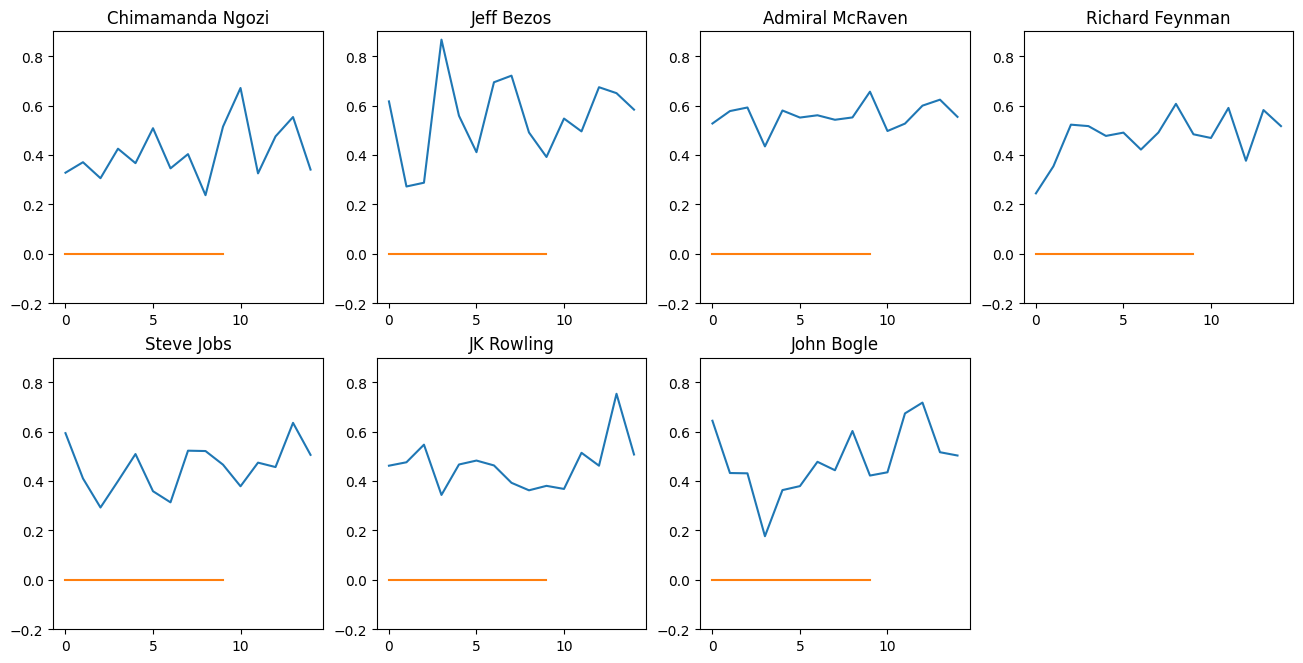

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.9)

plt.show()

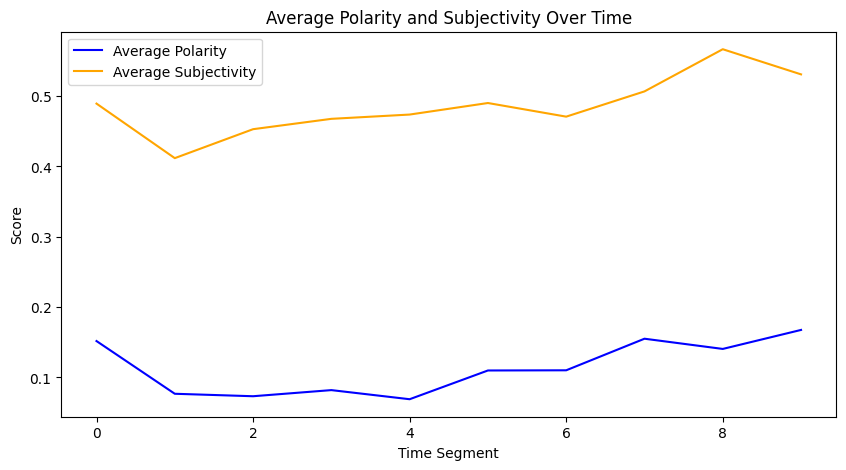

In [ ]:
# Line Plots of Average Polarity and Subjectivity Over Time
avg_polarity = np.mean(polarity_transcript, axis=0)
avg_subjectivity = np.mean([[TextBlob(piece).sentiment.subjectivity for piece in lp] for lp in list_pieces], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(avg_polarity, label='Average Polarity', color='blue')
plt.plot(avg_subjectivity, label='Average Subjectivity', color='orange')
plt.title('Average Polarity and Subjectivity Over Time')
plt.xlabel('Time Segment')
plt.ylabel('Score')
plt.legend()
plt.show()


In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces


[['background speech originally delivered tedglobal july . ted copyright owner talk original video featured . speech transcript ’ storyteller . would like tell personal stories like call “ danger single story. ” grew university campus eastern nigeria . mother says started reading age two , although think four probably close truth . early reader , read british american children ’ books . also early writer , began write , age seven , stories pencil crayon illustrations poor mother obligated read , wrote exactly kinds stories reading : characters white blue-eyed , played snow , ate apples , talked lot weather , lovely sun come . , despite fact lived nigeria . never outside nigeria . ’ snow , ate mangoes , never talked weather , need . characters also drank lot ginger beer , characters british books read drank ginger beer . never mind idea ginger beer . many years afterwards , would desperate desire taste ginger beer . another story . demonstrates , think , impressionable vulnerable face s

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.05405032467532465,
  0.05095598845598844,
  -0.01316442816442816,
  0.05610119047619047,
  0.181516290726817],
 [-0.004487179487179471,
  0.16352040816326527,
  0.20673076923076922,
  0.15479282622139764,
  0.20754830917874398],
 [0.12231990665584418,
  0.055153094653094634,
  0.04865669683851501,
  0.03684200414969646,
  0.1139106700427456],
 [0.09419753086419752,
  0.28297940797940796,
  0.22344322344322337,
  0.22240587695133154,
  0.1402175060711646],
 [0.09541316526610645,
  -0.0047027417027417015,
  0.007408655286013774,
  0.08839743589743589,
  0.030838143338143345],
 [0.18904761904761908,
  -0.008684318555008215,
  0.06264781966001477,
  0.12058080808080811,
  0.1651615826034431],
 [0.20638736263736263,
  -0.044444444444444446,
  0.0762202380952381,
  0.3152954545454546,
  0.20791666666666667]]

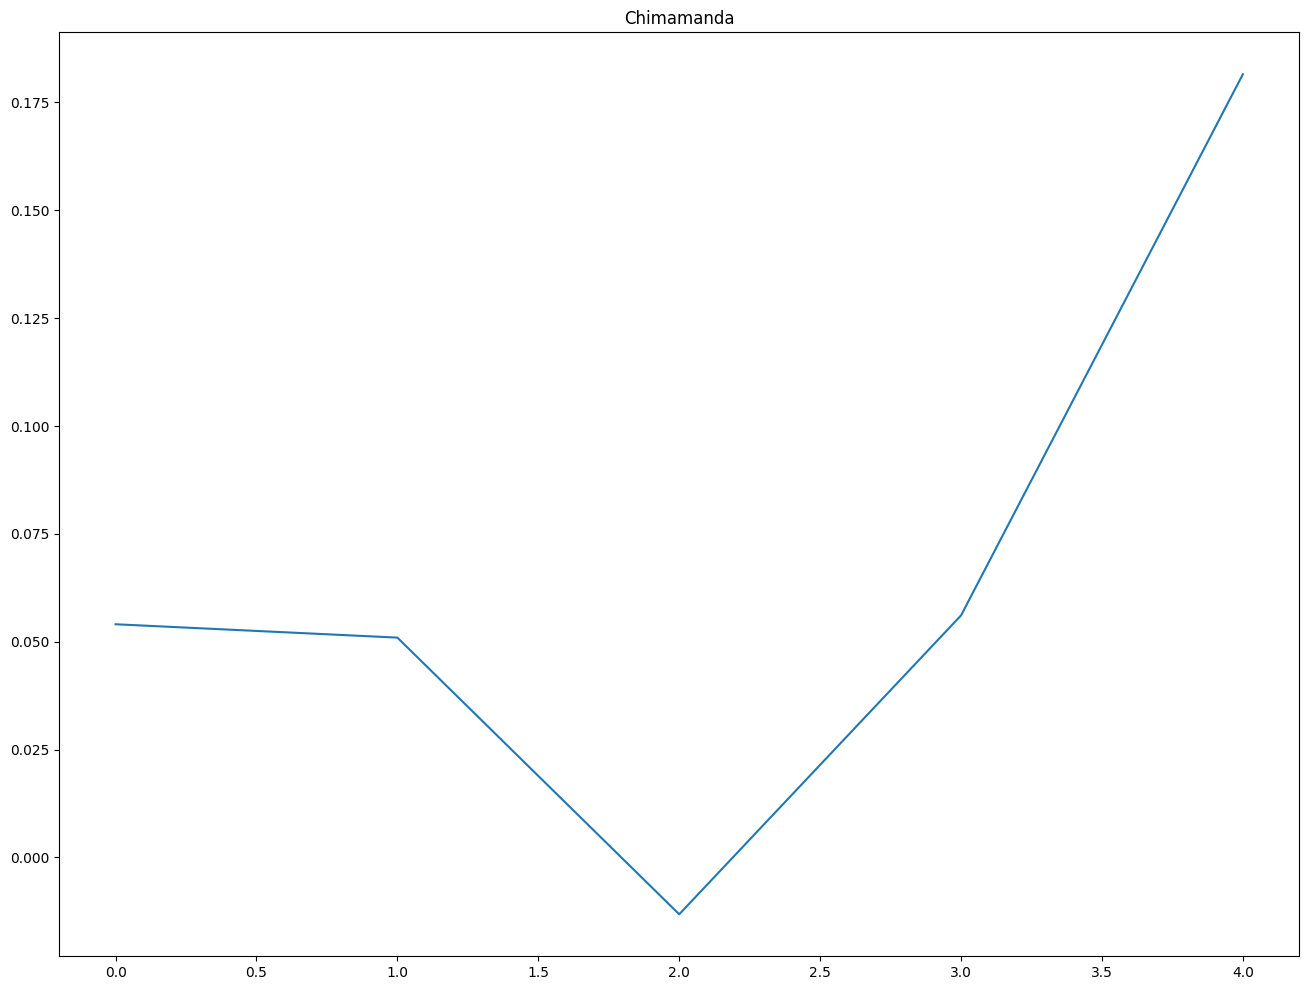

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

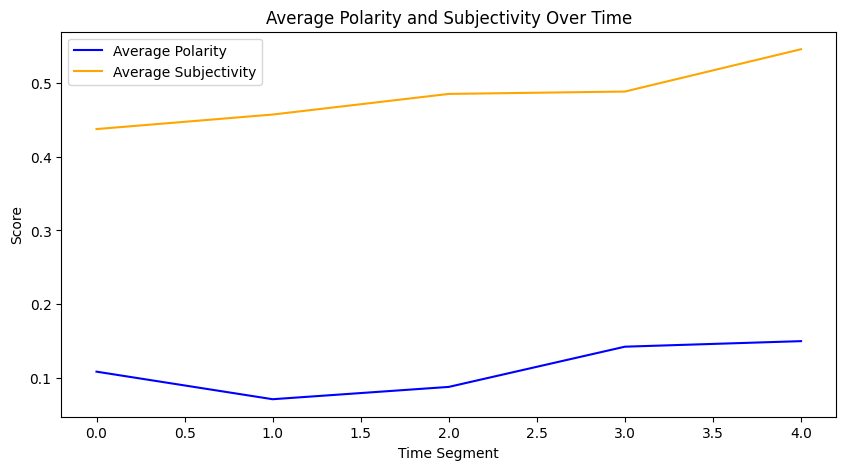

In [ ]:
# Line Plots of Average Polarity and Subjectivity Over Time
avg_polarity = np.mean(polarity_transcript, axis=0)
avg_subjectivity = np.mean([[TextBlob(piece).sentiment.subjectivity for piece in lp] for lp in list_pieces], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(avg_polarity, label='Average Polarity', color='blue')
plt.plot(avg_subjectivity, label='Average Subjectivity', color='orange')
plt.title('Average Polarity and Subjectivity Over Time')
plt.xlabel('Time Segment')
plt.ylabel('Score')
plt.legend()
plt.show()

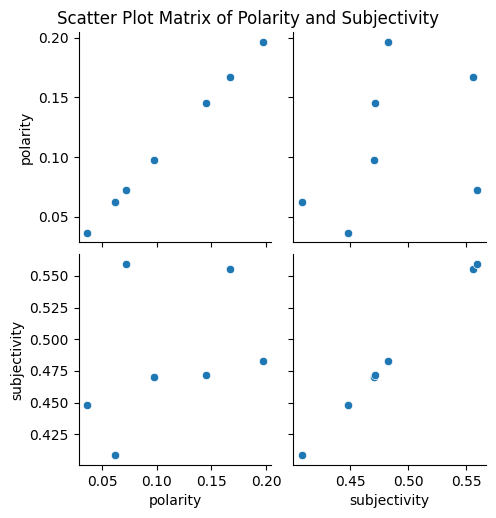

In [ ]:
# Scatter Plot Matrix
import seaborn as sns

sns.pairplot(data, vars=['polarity', 'subjectivity'], diag_kind=None)
plt.suptitle('Scatter Plot Matrix of Polarity and Subjectivity', y=1.02)
plt.show()

In [ ]:
import numpy as np
import math
from textblob import TextBlob

def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 5 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

# Define a list of values for n
n_values = [5, 10, 15]

# Initialize a dictionary to store results for each value of n
results = {}

# Iterate over each value of n
for n in n_values:
    # Split each routine into n parts
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    # Calculate polarity for each part
    polarity_transcript = []
    for lp in list_pieces:
        polarity_piece = []
        for p in lp:
            polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_transcript.append(polarity_piece)

    # Store the results for the current value of n
    results[n] = polarity_transcript

# Display the results
for n, result in results.items():
    print(f"Polarity transcript for n={n}:")
    print(result)


Polarity transcript for n=5:
[[0.05405032467532465, 0.05095598845598844, -0.01316442816442816, 0.05610119047619047, 0.181516290726817], [-0.004487179487179471, 0.16352040816326527, 0.20673076923076922, 0.15479282622139764, 0.20754830917874398], [0.12231990665584418, 0.055153094653094634, 0.04865669683851501, 0.03684200414969646, 0.1139106700427456], [0.09419753086419752, 0.28297940797940796, 0.22344322344322337, 0.22240587695133154, 0.1402175060711646], [0.09541316526610645, -0.0047027417027417015, 0.007408655286013774, 0.08839743589743589, 0.030838143338143345], [0.18904761904761908, -0.008684318555008215, 0.06264781966001477, 0.12058080808080811, 0.1651615826034431], [0.20638736263736263, -0.044444444444444446, 0.0762202380952381, 0.3152954545454546, 0.20791666666666667]]
Polarity transcript for n=10:
[[0.03527568922305764, 0.0710368996083282, -0.08053391053391054, 0.2701058201058201, -0.03407738095238095, 0.010736089307517882, 0.13581780538302277, -0.017238095238095226, 0.2379629629

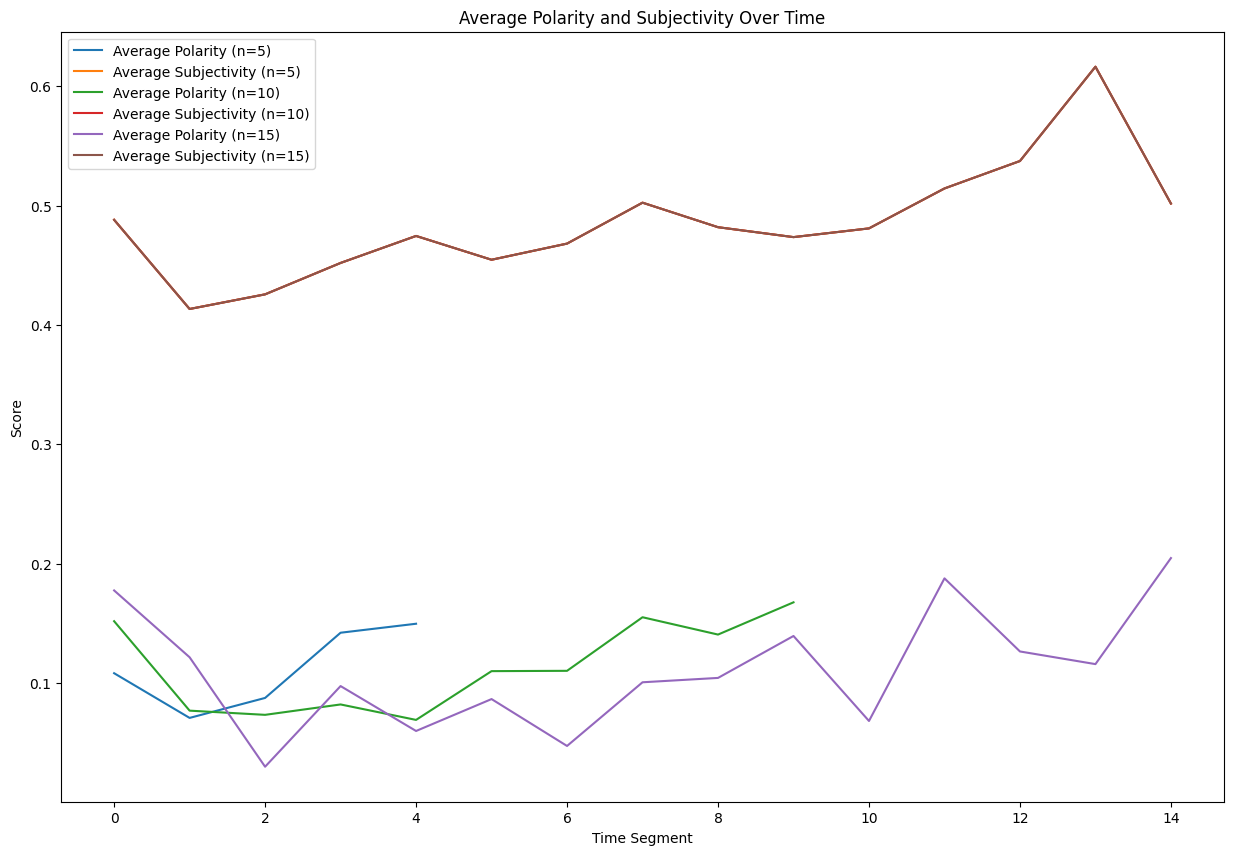

In [ ]:
# Line Plots of Average Polarity and Subjectivity Over Time
plt.figure(figsize=(15, 10))

# Iterate over each value of n and plot average polarity and subjectivity
for n, polarity_transcript in results.items():
    avg_polarity = np.mean(polarity_transcript, axis=0)
    avg_subjectivity = np.mean([[TextBlob(piece).sentiment.subjectivity for piece in lp] for lp in list_pieces], axis=0)
    plt.plot(avg_polarity, label=f'Average Polarity (n={n})')
    plt.plot(avg_subjectivity, label=f'Average Subjectivity (n={n})')

plt.title('Average Polarity and Subjectivity Over Time')
plt.xlabel('Time Segment')
plt.ylabel('Score')
plt.legend()
plt.show()

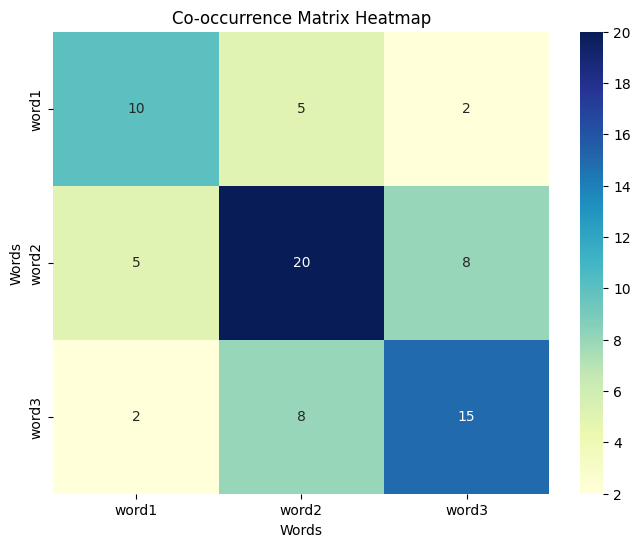

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example co-occurrence matrix (replace this with your actual data)
co_occurrence_matrix = np.array([[10, 5, 2],
                                 [5, 20, 8],
                                 [2, 8, 15]])

# Example list of words (replace this with your actual list of words)
words = ["word1", "word2", "word3"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=words, yticklabels=words)
plt.xlabel("Words")
plt.ylabel("Words")
plt.title("Co-occurrence Matrix Heatmap")
plt.show()

Polarity transcript for n=5:
[[0.05405032467532465, 0.05095598845598844, -0.01316442816442816, 0.05610119047619047, 0.181516290726817], [-0.004487179487179471, 0.16352040816326527, 0.20673076923076922, 0.15479282622139764, 0.20754830917874398], [0.12231990665584418, 0.055153094653094634, 0.04865669683851501, 0.03684200414969646, 0.1139106700427456], [0.09419753086419752, 0.28297940797940796, 0.22344322344322337, 0.22240587695133154, 0.1402175060711646], [0.09541316526610645, -0.0047027417027417015, 0.007408655286013774, 0.08839743589743589, 0.030838143338143345], [0.18904761904761908, -0.008684318555008215, 0.06264781966001477, 0.12058080808080811, 0.1651615826034431], [0.20638736263736263, -0.044444444444444446, 0.0762202380952381, 0.3152954545454546, 0.20791666666666667]]


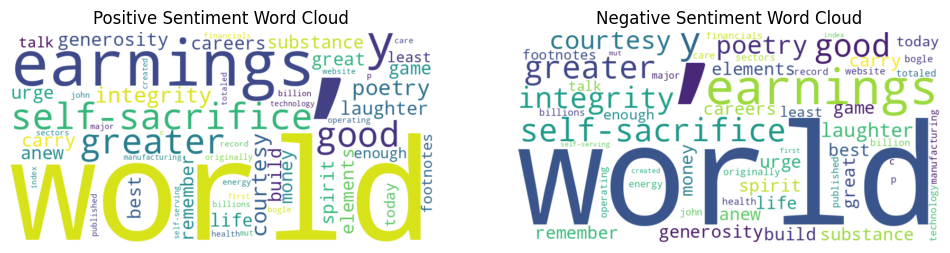

Polarity transcript for n=10:
[[0.03527568922305764, 0.0710368996083282, -0.08053391053391054, 0.2701058201058201, -0.03407738095238095, 0.010736089307517882, 0.13581780538302277, -0.017238095238095226, 0.23796296296296296, 0.13071428571428573], [0.09166666666666667, -0.033333333333333326, 0.26275510204081626, 0.0642857142857143, 0.22595238095238096, 0.18051948051948052, 0.08499999999999999, 0.21824085005903185, 0.22803030303030303, 0.2280982905982906], [0.16292225247870407, 0.08417830906467275, 0.048930763329497494, 0.059790492526341575, 0.033886859668109656, 0.06920603551038332, 0.005019554309327035, 0.07141454224787559, 0.18474677932509256, 0.03655018227386648], [0.13939393939393938, 0.063125, 0.4259259259259259, 0.15575396825396826, 0.10416666666666666, 0.3064182194616977, 0.2677705627705628, 0.081998556998557, 0.11195670995670995, 0.184375], [0.10637755102040818, 0.08773809523809524, -0.012841021825396814, 0.006620082815734988, 0.06151433691756271, -0.06883116883116884, 0.10320833

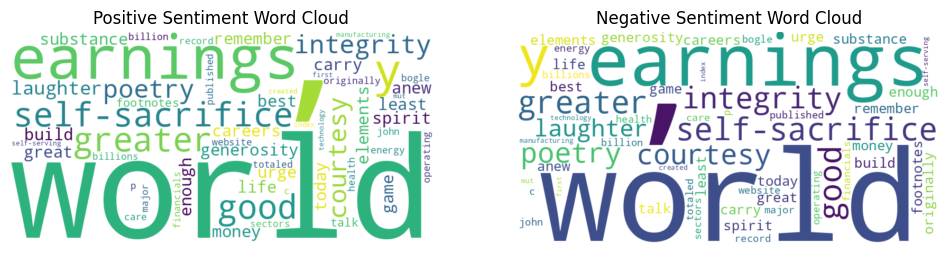

Polarity transcript for n=15:
[[0.09450549450549452, 0.04230769230769231, 0.027388682745825597, -0.13734335839599, 0.14961802902979374, 0.20932539682539678, -0.051309523809523805, -0.08407738095238095, 0.07395833333333333, 0.17030812324929973, -0.03253968253968253, 0.01785714285714286, 0.12833333333333335, 0.2833333333333333, 0.10494505494505495], [0.09166666666666667, 0.19444444444444445, -0.375, 0.5, -0.01214285714285715, 0.10833333333333335, 0.2231481481481481, 0.2333333333333333, 0.18367346938775508, 0.14166666666666666, 6.938893903907228e-18, 0.21824085005903185, 0.21481481481481482, 0.1375, 0.29475308641975306], [0.18607285258601045, 0.11958649840725312, 0.060759330759330744, 0.05041678179976052, 0.05511281091789567, 0.05800098635541673, 0.03401064213564212, 0.05615573942186846, 0.052525252525252523, 0.035683497536945795, 0.01963352739214808, 0.058036754911754904, 0.23162643515904383, 0.05367733457019173, 0.08603644417597905], [0.13333333333333333, 0.08933333333333333, 0.11499999

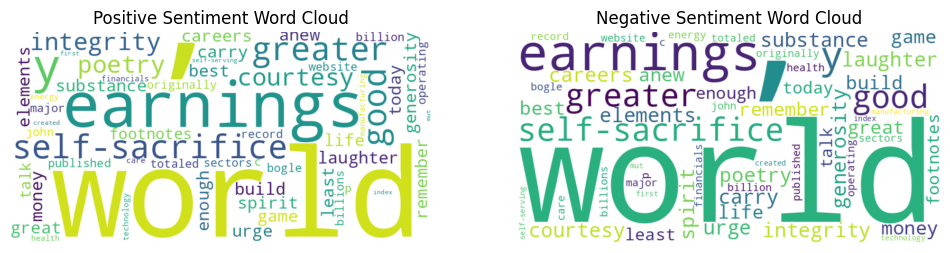

In [ ]:
import numpy as np
import math
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 5 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

# Define a list of values for n
n_values = [5, 10, 15]

# Initialize a dictionary to store results for each value of n
results = {}

# Iterate over each value of n
for n in n_values:
    # Split each routine into n parts
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    # Calculate polarity for each part
    polarity_transcript = []
    for lp in list_pieces:
        polarity_piece = []
        for p in lp:
            polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_transcript.append(polarity_piece)

    # Store the results for the current value of n
    results[n] = polarity_transcript

# Display the results
for n, result in results.items():
    print(f"Polarity transcript for n={n}:")
    print(result)

    # Generate word clouds for positive and negative sentiment
    positive_words = {}
    negative_words = {}
    for transcript in result:
        for polarity in transcript:
            for word in TextBlob(p).words:
                if polarity > 0:
                    positive_words[word.lower()] = positive_words.get(word.lower(), 0) + 1
                elif polarity < 0:
                    negative_words[word.lower()] = negative_words.get(word.lower(), 0) + 1

    # Generate word clouds for positive and negative sentiment
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words)
    negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_words)

    # Plot the word clouds
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Positive Sentiment Word Cloud')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Negative Sentiment Word Cloud')
    plt.axis('off')

    plt.show()
